# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as HSM

## Question 1

We use the class to find how $\frac{H_F}{H_M}$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma =$ {0.5, 1.0, 1.5}

In [38]:
# We define the model 
model = HSM.HouseholdSpecializationModelClass()

# We define alpha and sigma 
alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]

# We create a dataframe where the alphas are the columns and sigmas are the indexes/rows 
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)

# For every alpha we loop over every sigma and use the 'solve_discrete' to extract HF and HM
for i in alpha_vector:
    for j in sigma_vector:
        # We add alpha_i to model 
        model.par.alpha = i
        # We add sigma_j to model 
        model.par.sigma = j
        # We solve the model 
        results = model.solve_discrete()
        # We find the ratio 
        ratio = results.HF/results.HM
        # We add the ratio to the dataframe 
        df.loc[j,i] = ratio

df = df.rename_axis('sigma').rename_axis('alpha', axis=1)
print('HF over HM changes for varying alpha and sigma')
print(df)

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in reciprocal
  # d. disutlity of work


HF over HM changes for varying alpha and sigma
alpha      0.25 0.50      0.75
sigma                         
0.5    0.545455  1.0  1.833333
1.0    0.307692  1.0      3.25
1.5    0.214286  1.0  4.666667


From the above table we see that when $\alpha = 0.25$, then $\frac{H_F}{H_M}$ decreases as $\sigma$ increases. All values $\in \space ]0,1[$. For $\alpha = 0.5$ then $\frac{H_F}{H_M} = 1$. Lastly, when $\alpha = 0.75$ then all values are above 1. 

## Question 2

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$ 

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


 wf  H ratio  w ratio
0.8   0.2231  -0.2231
0.9   0.0000  -0.1054
1.0   0.0000   0.0000
1.1  -0.1178   0.0953
1.2  -0.2231   0.1823


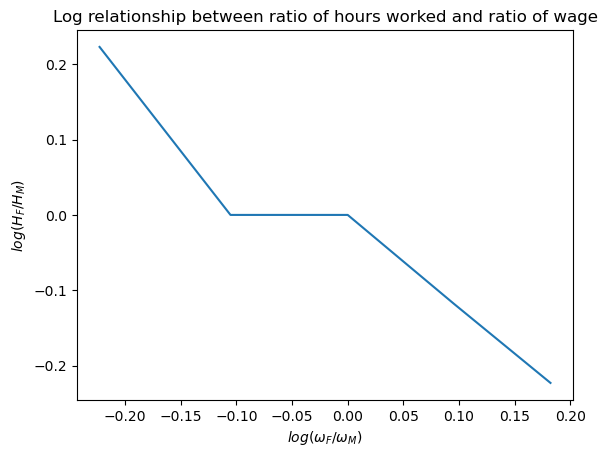

In [45]:
# We initialize alpha and sigma 
model.par.alpha = 0.5
model.par.sigma = 1

# Empty lists to contain the log H and w 
logratioH = []
logratiow = []

# We loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    model.par.wF = i
    # We use 'solve_discrete' from the class to find the results 
    results = model.solve_discrete()
    logratioH.append(np.log(results.HF/results.HM))
    logratiow.append(np.log(i/model.par.wM))

# We construct a dataframe to contain H and w ratios depending on wF
plot_df = pd.DataFrame({"wf": model.par.wF_vec})
# We add 'logratioH' and 'logratiow' to the dataframe 
plot_df["H ratio"] = logratioH
plot_df["w ratio"] = logratiow

#### Lav plottet pænere ####
# We print the table 
plot_df["H ratio"] = plot_df["H ratio"].round(4)
plot_df["w ratio"] = plot_df["w ratio"].round(4)
print(plot_df.to_string(index=False))

# We illustrate the relationship between 'logratioH' and 'logratiow' for given wF 
model.plot_illustration(plot_df)

## Question 3

 wf   H ratio   w ratio
0.8  0.130284 -0.223144
0.9  0.000203 -0.105361
1.0  0.000000  0.000000
1.1 -0.000141  0.095310
1.2 -0.103383  0.182322


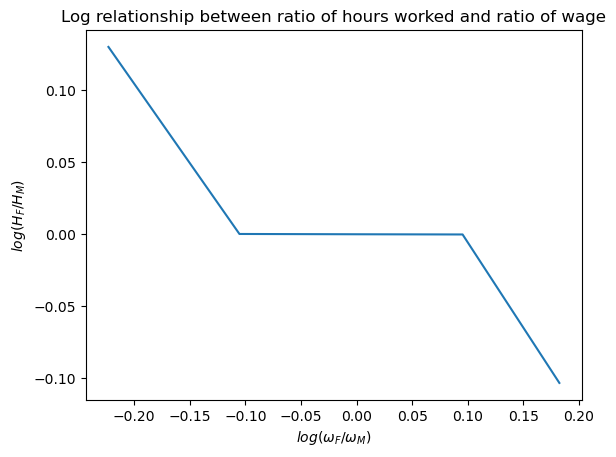

In [35]:
# Empty lists to contain the log H and w 
logratioHc=[]
logratiowc=[]

# We loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    model.par.wF = i
    resultsc =model.solve()
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    logratiowc.append(np.log(i/model.par.wM))

# We construct a dataframe to contain H and w ratios depending on wF
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec})
# We set title and axis labels 
plot_dfc["H ratio"] =  logratioHc
plot_dfc["w ratio"] =  logratiowc
print(plot_dfc.to_string(index=False))

# We illustrate the relationship between 'logratioH' and 'logratiow' for given wF 
model.plot_illustration(plot_dfc)

## Question 4

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: overflow encountered in double_scalars
  
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0, 0.5, '$log(H_F/H_M)$')

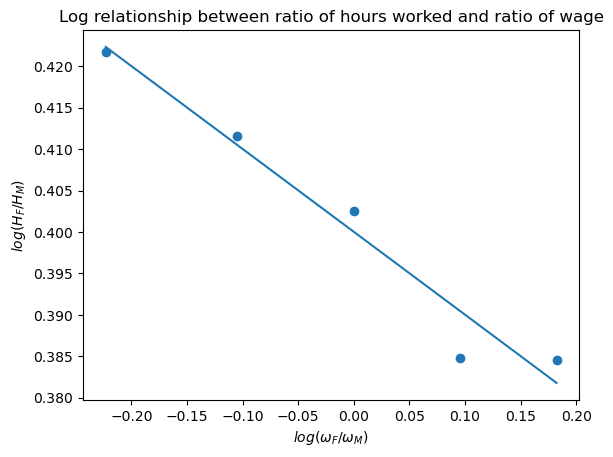

In [36]:
# We use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# We find the log H ratio 
rationy = np.log(model.sol.HF_vec/model.sol.HM_vec)

# We construct a figure to illustrate the relationship between log H ratio and log w ratio 
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
# We add the 'rationy' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),rationy)
# We add the regression from the model 
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))
# We set title and axis labels 
ax.set_title('Log relationship between ratio of hours worked and ratio of wage')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')


## Question 5

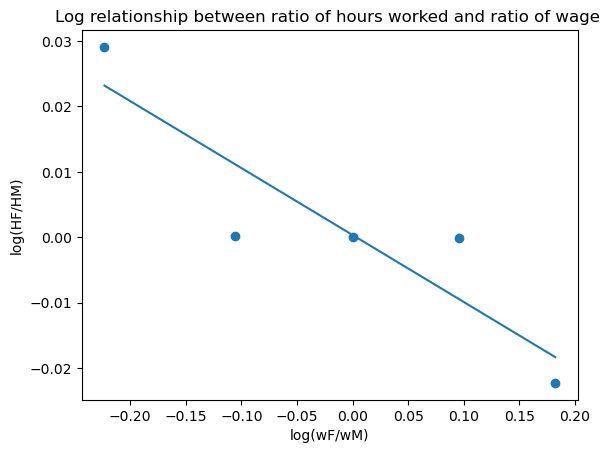

In [91]:
model.estimate(alpha=0.5)

rationy = np.log(model.sol.HF_vec/model.sol.HM_vec)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.scatter(np.log(model.par.wF_vec),rationy)
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');